In [5]:
import pandas as pd
import numpy as np
import df_utils 
import pickle

import utils
import kneighbors

In [2]:
# Config
optimize : bool = False
train : bool = False
train_test_split: float = 0.85

In [3]:
diff = pd.read_csv('./data/diff.csv')

# Data sets

In [7]:
np.random.seed(0)
train_mask : np.ndarray = np.random.rand(len(diff)) < train_test_split

In [8]:
# clean and normalized
train_1, test_1 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=False,
                                      rate_features=False)


# normalice with no 1 in targets to calculate mean
train_2, test_2 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=2,
                                      cuad_features=False,
                                      rate_features=False)


# add rate features
train_3, test_3 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=False,
                                      rate_features=True)

# add cuadratic features
train_4, test_4 = df_utils.prepare_df(df_original=diff, 
                                      train_mask=train_mask,
                                      normalize=1,
                                      cuad_features=True,
                                      rate_features=False)

# Compare features


In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=5)

base average precision : 0.9741327354852278
alternative normalization average precision : 0.9724329772464091
t_stat: 1.307225818869882 
p_value: 0.19629479928115207
Can't reject null hypothesis, both datasets behave equally


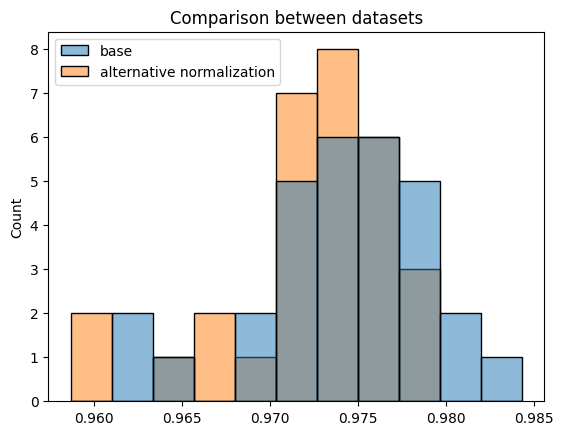

In [34]:
scores_1, scores_2 = utils.compare_features(train_a = train_1,
                                            train_b = train_2,
                                            feat_name_a = "base",
                                            feat_name_b = "alternative normalization",
                                            model = kn_classifier,
                                            metric = "precision",
                                            n_folds = 30,
                                            n_samples = None
                                            )

base average precision : 0.9740537377986206
base + rate features average precision : 0.9741237242887347
t_stat: -0.0498536296297847 
p_value: 0.9604459056233249
Can't reject null hypothesis, both datasets behave equally


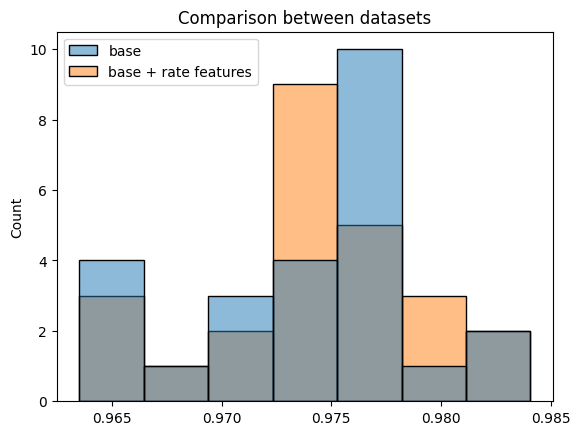

In [25]:
scores_1, scores_3 = utils.compare_features(train_a = train_1,
                                            train_b = train_3,
                                            feat_name_a = "base",
                                            feat_name_b = "base + rate features",
                                            model = kn_classifier,
                                            metric = "precision",
                                            n_folds = 25,
                                            n_samples = None)

base average precision : 0.9740537377986206
base + cuadratic features average precision : 0.9745169167269355
t_stat: -0.328644319078199 
p_value: 0.7438540791392074
Can't reject null hypothesis, both datasets behave equally


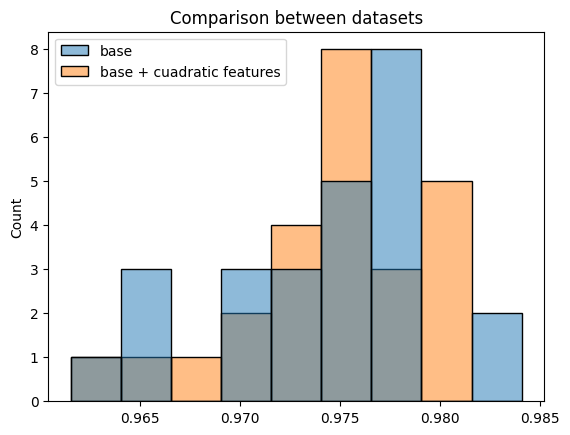

In [33]:
scores_1, scores_4 = utils.compare_features(train_a = train_1,
                                            train_b = train_4,
                                            feat_name_a = "base",
                                            feat_name_b = "base + cuadratic features",
                                            model = kn_classifier,
                                            metric = "precision",
                                            n_folds = 25,
                                            n_samples = None)

# Model

<Figure size 300x200 with 0 Axes>

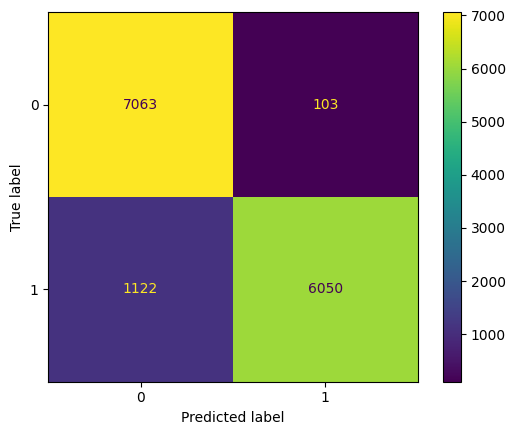

{'accuracy': 0.914562700516111,
 'f1': 0.9080675422138836,
 'recall': 0.843558282208589,
 'precision': 0.9832601982772631}

In [14]:
clf = kneighbors.train_k_neighbors(train_data=train_1,n_neighbors=5,p=1,optimize=False)
predictions,_,metrics = utils.get_predictions(test_data=test_1,model=clf)
metrics

<Figure size 300x200 with 0 Axes>

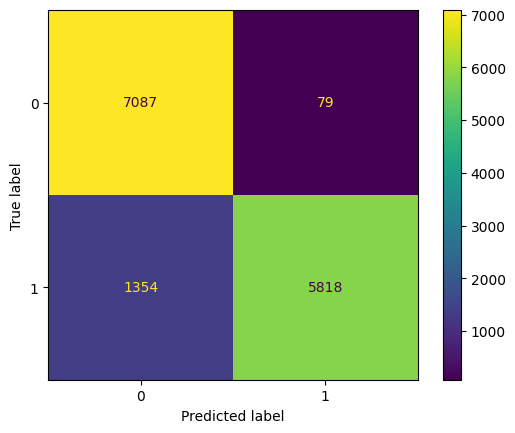

{'accuracy': 0.900055795787418,
 'f1': 0.8903512127936338,
 'recall': 0.8112102621305075,
 'precision': 0.9866033576394777}

In [15]:
clf = kneighbors.train_k_neighbors(train_data=train_1,n_neighbors=6,p=1,optimize=False)
predictions,_,metrics = utils.get_predictions(test_data=test_1,model=clf)
metrics